In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
def npmap2d(fun, xs, ys, doPrint=False):
  Z = np.empty(len(xs) * len(ys))
  i = 0
  for y in ys:
    for x in xs:
      Z[i] = fun(x, y)
      if doPrint: print([i, x, y, Z[i]])
      i += 1
  X, Y = np.meshgrid(xs, ys)
  Z.shape = X.shape
  return X, Y, Z

## Distributions

In [185]:
mu1 = np.array([0, 0])
sigma1 = np.sqrt(1)
mu2 = np.array([2, 0])
sigma2 = np.sqrt(4)
D1 = sigma1**2
D2 = sigma2**2

def pdf(x, mu, sigma):
    offset = x - mu
    r = offset.dot(offset)
    y = 1/(2*np.pi*sigma*sigma)*np.exp(-offset.dot(offset)/(2*sigma*sigma))
    return y

(0.0, 0.1)

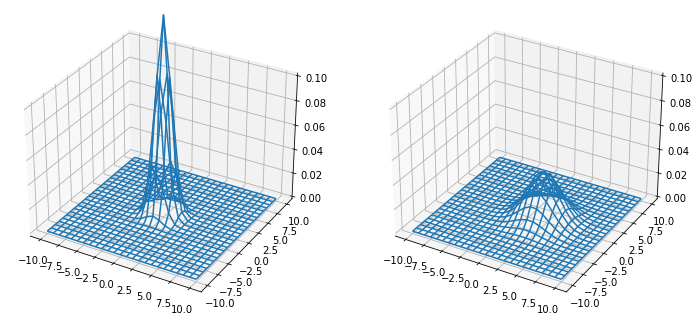

In [201]:
n_points = 25
x1s = np.linspace(-10, 10, n_points)
x2s = np.linspace(-10, 10, n_points)
X1, X2, Y = npmap2d(lambda x1, x2: pdf(np.array([x1, x2]), mu1, sigma1), x1s, x2s)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X1, X2, Y)
ax.set_zlim(0, 0.1)

x1s = np.linspace(-10, 10, n_points)
x2s = np.linspace(-10, 10, n_points)
X1, X2, Y = npmap2d(lambda x1, x2: pdf(np.array([x1, x2]), mu2, sigma2), x1s, x2s)

# fig = plt.figure()
ax = fig.add_subplot(122, projection='3d')
ax.plot_wireframe(X1, X2, Y)
ax.set_zlim(0, 0.1)

# ax.scatter(X1, X2, Y)
# for i in range(X1.size):
#     x1, x2, y = X1.ravel()[i], X2.ravel()[i], Y.ravel()[i]
#     x1s = [x1, x1]
#     ax.plot([x1, x1], [x2, x2], [0, y])

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

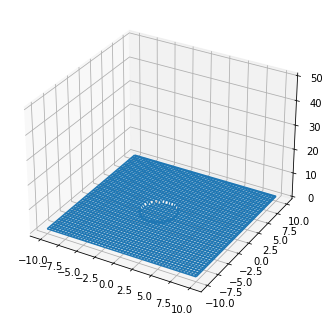

In [219]:
n_points = 100
x1s = np.linspace(-10, 10, n_points)
x2s = np.linspace(-10, 10, n_points)
X1, X2, Y = npmap2d(lambda x1, x2: pdf(np.array([x1, x2]), mu1, sigma1) < pdf(np.array([x1, x2]), mu2, sigma2) , x1s, x2s)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X1, X2, Y)
ax.set_zlim(0, 50)
Y

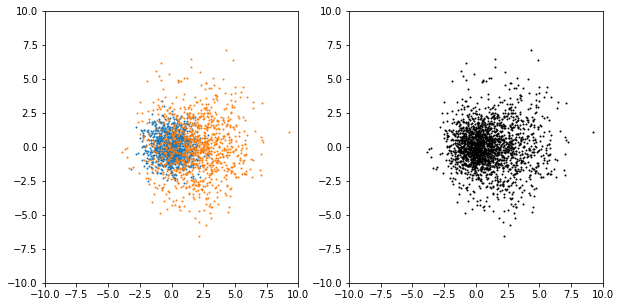

In [183]:
n_points = 1000

def random_custDist(n, pdf):
    samples = np.empty((n, 2))
    i = 0
    while i < n:
        x = np.random.uniform(-10, 10, 2)
        p = pdf(x)
        if np.random.uniform(low=0,high=1) <= p:
            samples[i] = x
            i += 1
    return np.array(samples)


x1s = random_custDist(n_points, lambda x: pdf(x, mu1, sigma1))
x2s = random_custDist(n_points, lambda x: pdf(x, mu2, sigma2))
# xs, np.hsplit(xs, 2)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
ax1.scatter(*np.hsplit(x1s, 2), s=1)
ax1.scatter(*np.hsplit(x2s, 2), s=1)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)
ax2.scatter(*np.hsplit(x1s, 2), s=1, c='#000')
ax2.scatter(*np.hsplit(x2s, 2), s=1, c='#000')
# xs

## Bayes

2.34

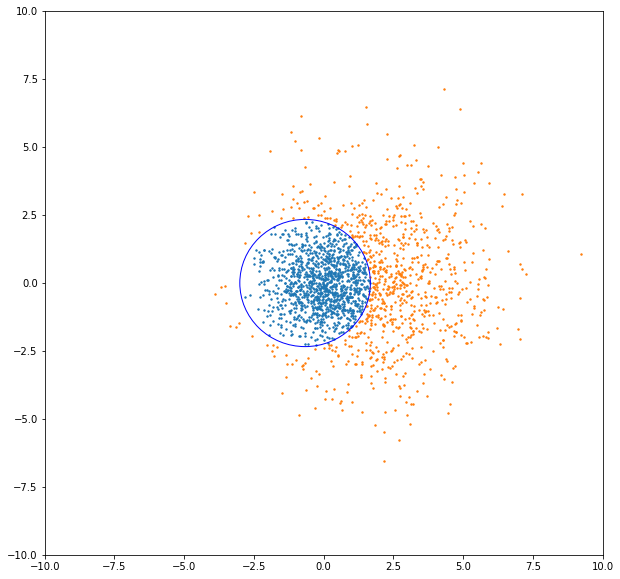

In [199]:
def lambda_x(x, mu1, sigma1, mu2, sigma2):
    D1 = sigma1**2
    D2 = sigma2**2
    offset1 = x - mu1
    offset2 = x - mu2
    lambd = D2 / D1 * np.exp(-1/2/D1 * (offset1.dot(offset1)) + 1/2/D2 * offset2.dot(offset2))
    return lambd

x_c = (D2*mu1 - D1*mu2) / (D2-D1)
mu_offset = mu1 - mu2
r_sq = D2*D1/(D2-D1)*(mu_offset.dot(mu_offset) / (D2-D1) + 4*np.log(D2/D1))
r = np.sqrt(r_sq)
r = 2.34

C1 = []
C2 = []
for x in x1s:
    l = lambda_x(x, mu1, sigma1, mu2, sigma2)
    if (l > 1): C1.append(x)
    else: C2.append(x)
for x in x2s:
    l = lambda_x(x, mu1, sigma1, mu2, sigma2)
    if (l > 1): C1.append(x)
    else: C2.append(x)


circle = plt.Circle(x_c, r, color='blue', fill=False)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
ax1.scatter(*np.hsplit(np.array(C1), 2), s=2)
ax1.scatter(*np.hsplit(np.array(C2), 2), s=2)
ax1.add_artist(circle)
r